# Descrição

Este projeto busca modelar em um grafo as relações entre empresa - orgão publico, quando ocorre uma licitação. Assim, podemos pensar que o grafo poderá ser dividido em dois subconjuntos de vértices (empresa e orgão público), ou seja, será um grafo bipartido.


## Dados

-   Os dados foram obtidos através do portal da transparência, https://portaldatransparencia.gov.br/download-de-dados, na aba de licitações e contratos.
-   Para limitar o escopo da análise, foi definido que apenas licitações do ano de 2022 serão utilizadas. E além disso, as analises serão feitas apenas em licitações que ocorreram na município Curitiba.
-   A pasta baixada possui as seguintes tabelas:
    -   Licitacoes: informações sobre a licitação.
    -   Participantes: informações sobre as empresas participantes da licitação. 
    -   Itens: informações sobre os itens soliticados.
    -   Empenhos Relacionados: informações sobre o empenho que é a etapa em que o governo reserva o dinheiro que será pago quando o bem for entregue ou o serviço concluído.
-   As pastas foram baixadas mês a mês.
-   As tabelas foram concatenadas e depois unidas para gerar um dataset final.
-   O dataset final ficou composto das seguintes informações:
    -   Número Licitação
    -   Código UG
    -   Nome UG
    -   Código Modalidade Compra
    -   Modalidade Compra
    -   Número Processo
    -   Objeto
    -   Situação Licitação
    -   Código Órgão Superior
    -   Nome Órgão Superior
    -   Código Órgão
    -   Nome Órgão
    -   UF
    -   Municipio
    -   Data Resultado Compra
    -   Data Abertura
    -   Valor Licitação
    -   Código Item Compra
    -   Descrição
    -   Quantidade Item
    -   Valor do Item
    -   Código Vencedor
    -   Nome Vencedor

Projeção

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

import networkx as nx

%matplotlib inline

### Load Data

In [2]:
def concatena_csv_em_pasta(pasta, columns_to_read=None):
    # Verifica se a pasta existe
    if not os.path.exists(pasta):
        return None

    arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

    if not arquivos_csv:
        return None

    # Cria uma lista para armazenar os DataFrames dos arquivos CSV
    dfs = []

    for arquivo_csv in arquivos_csv:
        caminho_arquivo = os.path.join(pasta, arquivo_csv)
        df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', usecols=columns_to_read)
        print(df)
        dfs.append(df)

    # Concatena todos os DataFrames em um único DataFrame
    dataframe_concatenado = pd.concat(dfs, ignore_index=True)

    return dataframe_concatenado

licitacoes = '../data_APS/licitacoes_2022'
participantes = '../data_APS/participantes_2022'
itens = '../data_APS/itens_2022'
empenhos_relacionados = '../data_APS/empenhosRelacionados_2022'


df_licitacoes22 = concatena_csv_em_pasta(licitacoes)
df_participantes22 = concatena_csv_em_pasta(participantes,  ['Número Licitação','Código UG', 'Código Participante', 'Nome Participante', 'Flag Vencedor'])
df_itens22 = concatena_csv_em_pasta(itens,['Número Licitação','Código UG', 'Código Item Compra', 'Descrição', 'Quantidade Item', 'Valor Item', 'Código Vencedor', 'Nome Vencedor'])
df_empenhos_relacionados22 = concatena_csv_em_pasta(empenhos_relacionados, ['Número Licitação','Código UG', 'Código Empenho', 'Observação Empenho', 'Valor Empenho (R$)'])

      Número Licitação  Código UG  \
0                12020     413006   
1                12021     120629   
2                12021     154849   
3                12021     158308   
4                12021     158373   
...                ...        ...   
5955         901032021     926137   
5956         901062021     926137   
5957         910572021     120060   
5958         911522021     120060   
5959         988512022     154040   

                                           Nome UG  Código Modalidade Compra  \
0          AGENCIA NACIONAL DE TELECOMUNICACOES-RS                         6   
1                    GRUPAMENTO DE APOIO DE CANOAS                         2   
2            IFPE - CAMPUS CABO DE SANTO AGOSTINHO                       -99   
3                INST.FED.DO PARA/CAMPUS CASTANHAL                       -99   
4                INST.FED.DO RN/CAMPUS JOAO CAMARA                         5   
...                                            ...                       ..

/tmp/ipykernel_18854/3838231747.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', usecols=columns_to_read)


        Número Licitação  Código UG Código Participante  \
0                  12019     495600      10761735000191   
1                  12019     495600      20204978000182   
2                  12019     495600      30814518000120   
3                  12019     495600      20421441000174   
4                  12021     160059      19037262000159   
...                  ...        ...                 ...   
418304         938862022     910809      03750414000126   
418305         938862022     910809      03750414000126   
418306         938862022     910809      03750414000126   
418307         938862022     910809      03750414000126   
418308         967302022     154040      42595652000166   

                                        Nome Participante Flag Vencedor  
0                  BR DANTAI DISTRIBUIDOR HOSPITALAR LTDA           NÃO  
1                          MBR COMERCIO DE MATERIAIS LTDA           NÃO  
2       MANHUACU CONSTRUCAO, TERCEIRIZACAO E COMERCIAL...           N

/tmp/ipykernel_18854/3838231747.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', usecols=columns_to_read)
/tmp/ipykernel_18854/3838231747.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', usecols=columns_to_read)


        Número Licitação  Código UG Código Participante  \
0                  12022     929546      33157312000162   
1                  12022     929546      19207352000140   
2                  12022     929546      69034668000156   
3                  12022     929546      12228728000154   
4                  12022     114605      27361863000140   
...                  ...        ...                 ...   
454395         993092022     910809      16925627000193   
454396         993092022     910809      04438673000189   
454397         993092022     910809      11223241000116   
454398         993092022     910809      14631732000194   
454399         994872022     154040      28019941000196   

                                        Nome Participante Flag Vencedor  
0                       IFOOD BENEFICIOS E SERVICOS LTDA.           NÃO  
1                  LE CARD ADMINISTRADORA DE CARTOES LTDA           NÃO  
2          SODEXO PASS DO BRASIL SERVICOS E COMERCIO S.A.           N

/tmp/ipykernel_18854/3838231747.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', usecols=columns_to_read)


        Número Licitação  Código UG Código Participante  \
0                  12019     153080      40884553000179   
1                  12022     110001      39371850000131   
2                  12022     110161      33402892000106   
3                  12022     114615      45456117000112   
4                  12022     120060      08377693000148   
...                  ...        ...                 ...   
480514         910082022     120060      55956510000129   
480515         910082022     120060      27263741000111   
480516         910082022     120060      08825548000182   
480517         910082022     120060      17370546000137   
480518         920072022     153035      33683111000107   

                                        Nome Participante Flag Vencedor  
0            CONCREFERRO CONSTRUCOES E INCORPORACOES LTDA           SIM  
1                     ROMA EDIFICACOES E CONSTRUCOES LTDA           SIM  
2           ASSOCIACAO BRASILEIRA DE NORMAS TECNICAS ABNT           S

In [3]:
df_licitacoes22.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
0,12020,413006,AGENCIA NACIONAL DE TELECOMUNICACOES-RS,6,Dispensa de Licitação,53528000739202091,Objeto: Aquisição de Materiais de Expediente p...,Encerrado,41000,Ministério das Comunicações,41231,Agêncial Nacional de Telecomunicações,RS,PORTO ALEGRE,14/02/2022,23/04/2020,"3035,8000"
1,12021,120629,GRUPAMENTO DE APOIO DE CANOAS,2,Tomada de Preços,67278003552202123,Objeto: Contratação de empresa de engenharia e...,Publicado,52000,Ministério da Defesa,52111,Comando da Aeronáutica,RS,CANOAS,10/02/2022,NaN,"779021,2300"
2,12021,154849,IFPE - CAMPUS CABO DE SANTO AGOSTINHO,-99,Pregão - Registro de Preço,23518004708202148,Objeto: Pregão Eletrônico - Registro de Preço...,Publicado,26000,Ministério da Educação,26418,Instituto Federal de Pernambuco,PE,CABO DE SANTO AGOSTINHO,15/02/2022,10/01/2022,"29550,0000"
3,12021,158308,INST.FED.DO PARA/CAMPUS CASTANHAL,-99,Pregão - Registro de Preço,23051001705202193,Objeto: Pregão Eletrônico - Aquisição de seme...,Publicado,26000,Ministério da Educação,26416,Instituto Federal do Pará,PA,CASTANHAL,14/02/2022,03/02/2022,"3243,0000"
4,12021,158373,INST.FED.DO RN/CAMPUS JOAO CAMARA,5,Pregão,23134002705202184,Objeto: Pregão Eletrônico - Recuperação emerg...,Evento de Resultado de Julgame,26000,Ministério da Educação,26435,Instituto Federal do Rio Grande do Norte,RN,JOAO CAMARA,09/02/2022,13/12/2021,"147185,9100"


In [4]:
df_licitacoes22.rename(columns={'Município': 'Municipio'}, inplace=True)
df_licitacoes22['Situação Licitação'].value_counts()

Situação Licitação
Encerrado                         62569
Publicado                         30831
Evento de Resultado de Julgame    10357
Evento de Suspensão Publicado      1236
Evento de Alteração Publicado       953
Divulgado                           720
Evento de Adiamento Publicado       480
Revogação                           434
Anulação                            418
Evento de Revogação Publicado       341
Evento de Alteração de Resulta      199
Evento de Anulação Publicado        195
Retificação                         159
Evento de Retificação Publicad       79
Evento de Retificação Divulgad       47
Evento de Adiamento Divulgado        45
Evento de Reabertura de Prazo        38
Evento de Alteração Divulgado        32
Inválido                             32
Evento de Revogação Divulgado        18
Evento de Habilitação Publicad        8
Pendente de Processamento             3
Evento de Alteração de Habilit        2
Name: count, dtype: int64

In [45]:
df_licitacoes_ctba = df_licitacoes22[df_licitacoes22.Municipio == 'CURITIBA']
df_licitacoes_ctba["code"] = df_licitacoes_ctba["Número Licitação"].astype(str) + "_" + df_licitacoes_ctba["Código UG"].astype(str)

/tmp/ipykernel_18854/3110833496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_licitacoes_ctba["code"] = df_licitacoes_ctba["Número Licitação"].astype(str) + "_" + df_licitacoes_ctba["Código UG"].astype(str)


In [49]:
map_orgao_by_code = df_licitacoes_ctba.set_index('code')['Código Órgão'].to_dict()

{'12022_114623': 25205, '12022_120072': 52111, '12022_153019': 26258, '12022_153079': 26241, '12022_153808': 26241, '12022_154358': 26258, '12022_158009': 26432, '12022_160077': 52121, '12022_160211': 52121, '12022_160212': 52121, '12022_160213': 52121, '12022_160217': 52121, '12022_160223': 52121, '12022_160224': 52121, '12022_170153': 46000, '12022_170156': 25000, '12022_200118': 30802, '12022_200364': 30108, '12022_250028': 36000, '12022_257048': 36000, '22022_120072': 52111, '22022_130070': 22000, '22022_153019': 26258, '22022_153079': 26241, '22022_153808': 26241, '22022_154358': 26258, '22022_160212': 52121, '22022_160213': 52121, '22022_160219': 52121, '22022_160223': 52121, '22022_160224': 52121, '22022_170153': 46000, '22022_170156': 25000, '32022_120072': 52111, '32022_160211': 52121, '32022_160213': 52121, '32022_160223': 52121, '32022_160224': 52121, '32022_170153': 46000, '42021_158009': 26432, '42022_120072': 52111, '42022_155902': 26443, '42022_160211': 52121, '42022_160

In [19]:
df_participantes22["code"] = df_participantes22["Número Licitação"].astype(str) + "_" + df_participantes22["Código UG"].astype(str)

In [93]:
df_licitacoes_ctba["Código UG"].value_counts()

Código UG
153079    1096
158009     509
155902     223
154358     149
120072     132
160224     119
160213     107
160223      83
160211      72
160217      72
153019      63
160077      63
130070      58
114623      51
170156      51
393028      50
160219      47
160192      43
373067      36
170153      36
160212      36
160220      34
200118      24
160222      22
343010      22
413004      19
257048      18
193118      16
160214      16
255016      14
135265      10
250028      10
200364       9
153808       3
Name: count, dtype: int64

In [37]:
df_participantes_ctba = df_participantes22[df_participantes22['code'].isin(df_licitacoes_ctba.index)]


In [67]:
df_participantes_ctba.head()

,Número Licitação,Código UG,Código Participante,Nome Participante,Flag Vencedor,code
7842,12022,160222,21545863000114,ORZIL CONSULTORIA E TREINAMENTO LTDA,SIM,12022_160222
21780,12022,250028,02560636000113,DANIEL LUCIANO MOREIRA,SIM,12022_250028
22227,12022,343010,04768594000136,CONTATO SERVICOS DE CONSERVACAO E MANUTENCAO LTDA,NÃO,12022_343010
22228,12022,343010,05427994000140,LG. ADMINISTRADORA DE SERVICOS LTDA,NÃO,12022_343010
22229,12022,343010,18125445000163,ARISTOCRATA TECNOLOGIA E APOIO ADMINISTRATIVOS...,NÃO,12022_343010


In [69]:
edges_df = df_participantes_ctba[['Número Licitação', 'Código UG', 'Código Participante', 'Flag Vencedor', 'code']]
# for index, row in edges_df.iterrows():
#     edges_df.loc[index, 'Código Órgão'] = map_orgao_by_code[row['code']]



In [70]:
# drop code column
edges_df.drop(columns=['code'], inplace=True)

In [71]:
# drop duplicates
edges_df.drop_duplicates(inplace=True)

In [ ]:
# df_participantes_ctba22 = df_participantes22_selec[df_participantes22_selec['Flag Vencedor'] == 'SIM']
# df_participantes_ctba22

,Número Licitação,Código UG,Código Participante,Nome Participante,Flag Vencedor
25,12021,130088,04604320000101,L.C.B.PONTES SERVICOS TERCEIRIZADOS LTDA,SIM
51,12021,130088,04604320000101,L.C.B.PONTES SERVICOS TERCEIRIZADOS LTDA,SIM
53,12021,152803,71443667000107,ORBITAL PRODUTOS PARA LABORATORIOS LTDA,SIM
54,12021,152803,36813448000171,MDL SOUZA COMERCIO LTDA,SIM
56,12021,152803,71443667000107,ORBITAL PRODUTOS PARA LABORATORIOS LTDA,SIM
...,...,...,...,...,...
4442677,910082022,120060,55956510000129,LIO SERUM PRODUTOS LABORATORIAIS E HOSPITALARE...,SIM
4442679,910082022,120060,27263741000111,RC SCIENTIFIC COMERCIO DE INSTRUMENTOS ANALITI...,SIM
4442680,910082022,120060,08825548000182,BRASSEN DISTRIBUIDORA E COMERCIO DE COSMETICOS...,SIM
4442681,910082022,120060,17370546000137,DIOXSAN ESPECIALIDADES QUIMICAS LTDA.,SIM


In [94]:
G = nx.Graph()
G.add_nodes_from(df_participantes_ctba['Código Participante'], bipartite=0)
G.add_nodes_from(df_licitacoes_ctba['Código UG'], bipartite=1)


# color each side of bipartite graph
color_map = []
for node in G:
    if G.nodes[node]['bipartite'] == 0:
        color_map.append('blue')
    else:
        color_map.append('green')


for index, row in edges_df.iterrows():
    G.add_edge(row['Código Participante'], row['Código UG'], winner=row['Flag Vencedor'])



In [95]:
# count subset sizes

blue = 0
green = 0
for node in G:
    if G.nodes[node]['bipartite'] == 0:
        blue += 1
    else:
        green += 1

print(blue)
print(green)

6471
34


In [99]:
# save to edgelist

nx.write_gexf(G, "../data_APS/licitacoes_2022.gexf")


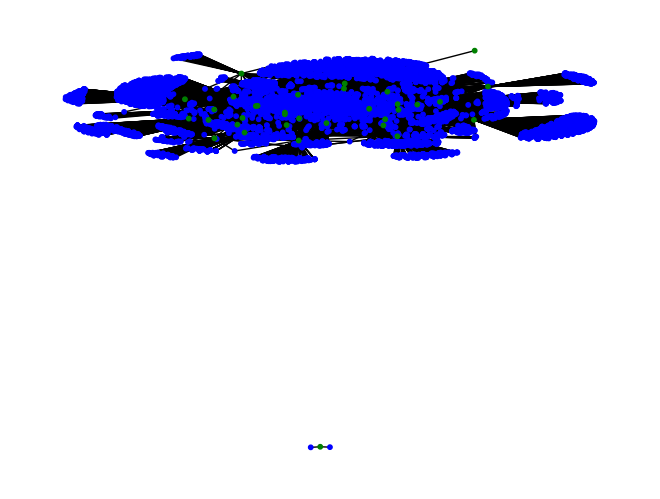

In [96]:

#print(G.edges(data=True))
nx.draw(G, node_color=color_map, node_size=10)
plt.show()

In [77]:
nx.is_connected(G)

False

In [ ]:
nx.betweenness_centrality(G)

{'ILUMINAR COMERCIO E REPRESENTACOES LTDA': 0.0,
 'MORK SOLAR - PRODUTOS E SERVICOS ELETRICOS LTDA': 0.002822433989645369,
 'COMERCIAL SPONCHIADO LTDA': 0.0012719380791937328,
 'J. J. VITALLI': 0.002750652511994846,
 'GIOVANI LOS': 0.0006951246898977856,
 'LICITARE PRODUTOS, MATERIAIS E SERVICOS LTDA': 0.00026472013694202296,
 'SZATA COMERCIO VAREJISTA LTDA': 0.002822433989645369,
 'MD COMERCIO E SERVICOS DE PINTURA LTDA': 0.0012719380791937328,
 'I.R. COMERCIO E MATERIAIS ELETRICOS LTDA': 0.00026472013694202296,
 'MULTI LITE COMERCIAL ELETRICA LTDA.': 0.0006951246898977856,
 'PROLUX ILUMINACAO LTDA': 0.0006555399294505092,
 'LIBERTY COMERCIO E ATACADISTA LTDA': 0.0,
 'TI COMPONENTES ELETRONICOS LTDA': 0.0,
 'LX DISTRIBUIDORA DE MATERIAIS ELETRICOS LTDA': 0.0012722419608205424,
 'EZ TECHS IMPORTADORA, EXPORTADORA E REPRESENTACOES LTDA': 0.0012722419608205424,
 'EMPALUX ELETROSHOP LTDA': 0.0,
 'GR COMERCIO LTDA': 0.0012722419608205424,
 'OLIVEIRA ARAUJO ENGENHARIA LTDA': 0.0,
 'ENGEPLAN

In [ ]:
projected_graph()


P = bipartite.projected_graph(G, ["a", "b"], multigraph=True)


B = nx.Graph()

B.add_edges_from([("a", 1), ("b", 1), ("a", 2), ("b", 2)])

G = bipartite.projected_graph(B, ["a", "b"], multigraph=True)